Processing fold 1/10
Processing fold 2/10
Processing fold 3/10
Processing fold 4/10
Processing fold 5/10
Processing fold 6/10
Processing fold 7/10
Processing fold 8/10
Processing fold 9/10
Processing fold 10/10


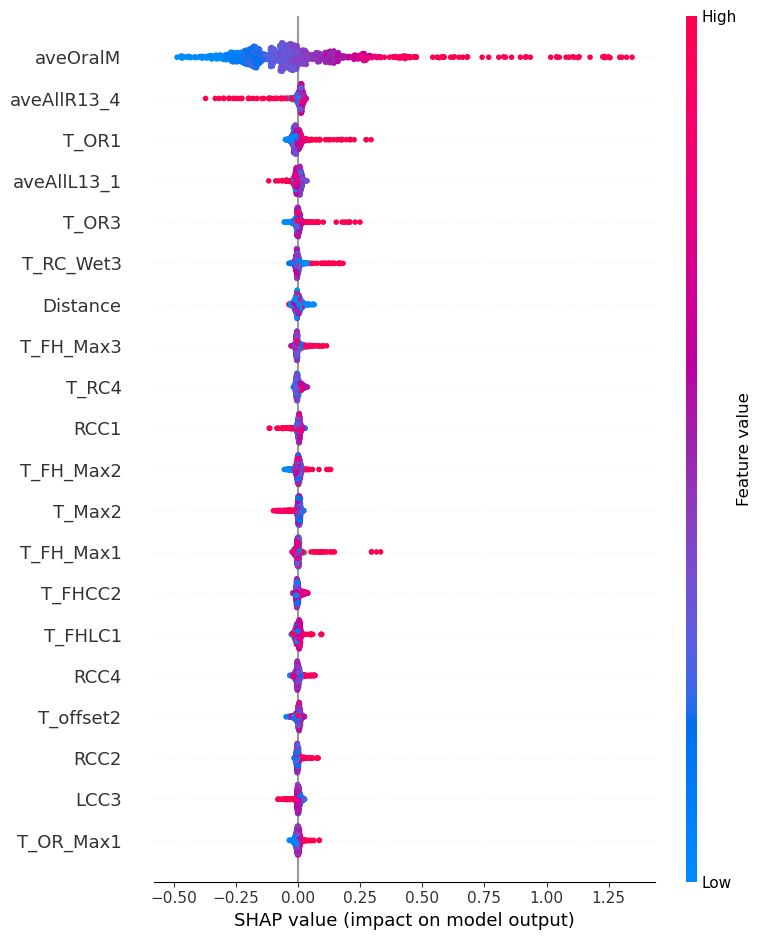

In [139]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split, KFold
import pandas as pd

# Load the dataset
df = pd.read_csv("ICI_groups1and2.csv", skiprows=1)

# Rename columns based on the first row (previously treated as data)
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

# Convert all numerical columns to float where possible
df = df.apply(pd.to_numeric, errors='coerce')

# Drop any columns that are completely NaN after conversion
df = df.dropna(axis=1, how='all')

# Define target variable and features
target = 'aveOralF'  # Assuming this as the regression target
features = [col for col in df.columns if col != target]

# Drop rows with missing target values
df = df.dropna(subset=[target])

# Split features and target
X = df[features]
y = df[target]

# Initialize k-fold cross-validation
n_splits = 10  # You can adjust the number of folds
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store results across folds
all_shap_values = []
all_X_test = []

# Perform k-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Processing fold {fold + 1}/{n_splits}")
    
    # Split data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model = HistGradientBoostingRegressor(max_iter=500, 
                                        learning_rate=0.1, 
                                        max_depth=6, 
                                        random_state=42)
    model.fit(X_train, y_train)
    
    # Compute SHAP values
    explainer = shap.Explainer(model, X_train)
    shap_values = explainer(X_test)
    
    # Store results
    all_shap_values.append(shap_values)
    all_X_test.append(X_test)

# Combine SHAP values and test sets from all folds
combined_shap_values = np.vstack([sv.values for sv in all_shap_values])
combined_X_test = pd.concat(all_X_test)

# Generate SHAP summary plot with combined results
shap.summary_plot(combined_shap_values, combined_X_test, feature_names=features)

# Optional: Calculate and print average model performance across folds
# You could add metrics like R² or MSE here if desired


Processing fold 1/5
Fold 1 - R² Score: 0.6989
Fold 1 - MSE: 0.0446

Processing fold 2/5
Fold 2 - R² Score: 0.7495
Fold 2 - MSE: 0.0484

Processing fold 3/5
Fold 3 - R² Score: 0.6432
Fold 3 - MSE: 0.0615

Processing fold 4/5
Fold 4 - R² Score: 0.7599
Fold 4 - MSE: 0.0303

Processing fold 5/5
Fold 5 - R² Score: 0.7520
Fold 5 - MSE: 0.0270

Cross-validation Results Summary:
Average R² Score: 0.7207 (± 0.0443)
Average MSE: 0.0423 (± 0.0126)


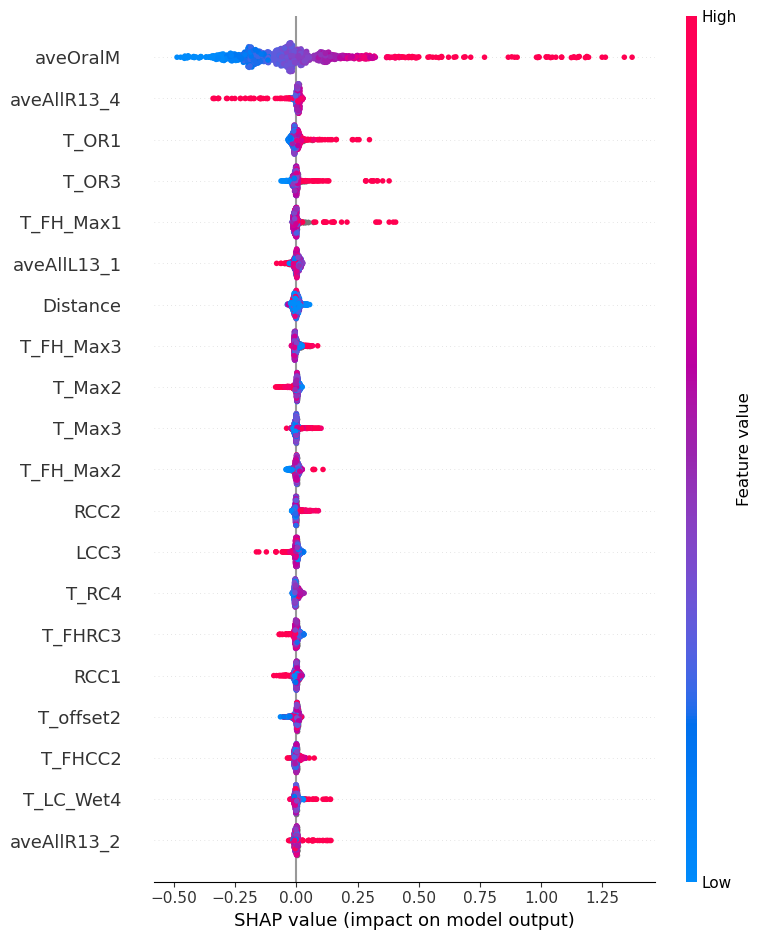

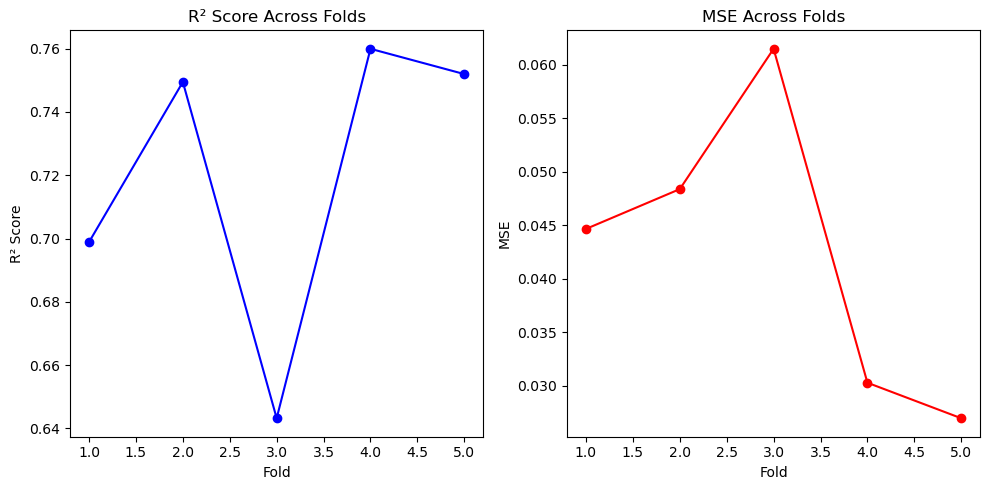

In [141]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split, KFold
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
df = pd.read_csv("ICI_groups1and2.csv", skiprows=1)

# Rename columns based on the first row (previously treated as data)
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

# Convert all numerical columns to float where possible
df = df.apply(pd.to_numeric, errors='coerce')

# Drop any columns that are completely NaN after conversion
df = df.dropna(axis=1, how='all')

# Define target variable and features
target = 'aveOralF'  # Assuming this as the regression target
features = [col for col in df.columns if col != target]

# Drop rows with missing target values
df = df.dropna(subset=[target])

# Split features and target
X = df[features]
y = df[target]

# Initialize k-fold cross-validation
n_splits = 5  # You can adjust the number of folds
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store results across folds
all_shap_values = []
all_X_test = []
r2_scores = []
mse_scores = []

# Perform k-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"\nProcessing fold {fold + 1}/{n_splits}")
    
    # Split data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model = HistGradientBoostingRegressor(max_iter=500, 
                                        learning_rate=0.1, 
                                        max_depth=6, 
                                        random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2_scores.append(r2)
    mse_scores.append(mse)
    
    # Compute SHAP values
    explainer = shap.Explainer(model, X_train)
    shap_values = explainer(X_test)
    
    # Store results
    all_shap_values.append(shap_values)
    all_X_test.append(X_test)
    
    # Print metrics for this fold
    print(f"Fold {fold + 1} - R² Score: {r2:.4f}")
    print(f"Fold {fold + 1} - MSE: {mse:.4f}")

# Combine SHAP values and test sets from all folds
combined_shap_values = np.vstack([sv.values for sv in all_shap_values])
combined_X_test = pd.concat(all_X_test)

# Calculate and print average metrics
avg_r2 = np.mean(r2_scores)
avg_mse = np.mean(mse_scores)
std_r2 = np.std(r2_scores)
std_mse = np.std(mse_scores)

print("\nCross-validation Results Summary:")
print(f"Average R² Score: {avg_r2:.4f} (± {std_r2:.4f})")
print(f"Average MSE: {avg_mse:.4f} (± {std_mse:.4f})")

# Generate SHAP summary plot with combined results
shap.summary_plot(combined_shap_values, combined_X_test, feature_names=features)

# Optional: Create a simple plot of metrics across folds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, n_splits + 1), r2_scores, 'bo-')
plt.title('R² Score Across Folds')
plt.xlabel('Fold')
plt.ylabel('R² Score')

plt.subplot(1, 2, 2)
plt.plot(range(1, n_splits + 1), mse_scores, 'ro-')
plt.title('MSE Across Folds')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.tight_layout()
plt.show()